In [2]:
from pycspwrapper import LVStat
from matplotlib import pyplot as plt

import pandas as pd

# Datu ielādes paragus

Izmantosim LVStat klasi lai iegūt un attēlot Indiešu skaitu latvijā.

In [7]:
lvstat = LVStat('lv', 'POP', 'IR', 'IRE', 'IRE010')
lvstat.set_query(ETHNICITY=['E_IND'],
    TIME = [str(i) for i in range(1990, 2025)])
lvstat.get_query()

{'query': [{'code': 'ETHNICITY',
   'selection': {'filter': 'item', 'values': ['E_IND']}},
  {'code': 'TIME',
   'selection': {'filter': 'item',
    'values': ['2000',
     '2011',
     '2012',
     '2013',
     '2014',
     '2015',
     '2016',
     '2017',
     '2018',
     '2019',
     '2020',
     '2021',
     '2022',
     '2023']}}],
 'response': {'format': 'json'}}

In [8]:
scb_data = lvstat.get_data()
scb_data

{'columns': [{'code': 'ETHNICITY', 'text': 'Tautība', 'type': 'd'},
  {'code': 'TIME', 'text': 'Laika periods', 'type': 't'},
  {'code': 'Iedzīvotāji pēc tautības gada sākumā',
   'text': 'Iedzīvotāji pēc tautības gada sākumā',
   'type': 'c'}],
 'comments': [{'variable': 'TIME',
   'value': '2000',
   'comment': 'Tautas skaitīšanas dati 31.03.2000.\r\n'}],
 'data': [{'key': ['E_IND', '2000'], 'values': ['7']},
  {'key': ['E_IND', '2011'], 'values': ['59']},
  {'key': ['E_IND', '2012'], 'values': ['57']},
  {'key': ['E_IND', '2013'], 'values': ['67']},
  {'key': ['E_IND', '2014'], 'values': ['70']},
  {'key': ['E_IND', '2015'], 'values': ['101']},
  {'key': ['E_IND', '2016'], 'values': ['141']},
  {'key': ['E_IND', '2017'], 'values': ['186']},
  {'key': ['E_IND', '2018'], 'values': ['661']},
  {'key': ['E_IND', '2019'], 'values': ['1137']},
  {'key': ['E_IND', '2020'], 'values': ['1351']},
  {'key': ['E_IND', '2021'], 'values': ['1139']},
  {'key': ['E_IND', '2022'], 'values': ['1181']

In [9]:
scb_fetch = scb_data['data']
scb_fetch

[{'key': ['E_IND', '2000'], 'values': ['7']},
 {'key': ['E_IND', '2011'], 'values': ['59']},
 {'key': ['E_IND', '2012'], 'values': ['57']},
 {'key': ['E_IND', '2013'], 'values': ['67']},
 {'key': ['E_IND', '2014'], 'values': ['70']},
 {'key': ['E_IND', '2015'], 'values': ['101']},
 {'key': ['E_IND', '2016'], 'values': ['141']},
 {'key': ['E_IND', '2017'], 'values': ['186']},
 {'key': ['E_IND', '2018'], 'values': ['661']},
 {'key': ['E_IND', '2019'], 'values': ['1137']},
 {'key': ['E_IND', '2020'], 'values': ['1351']},
 {'key': ['E_IND', '2021'], 'values': ['1139']},
 {'key': ['E_IND', '2022'], 'values': ['1181']},
 {'key': ['E_IND', '2023'], 'values': ['1654']}]

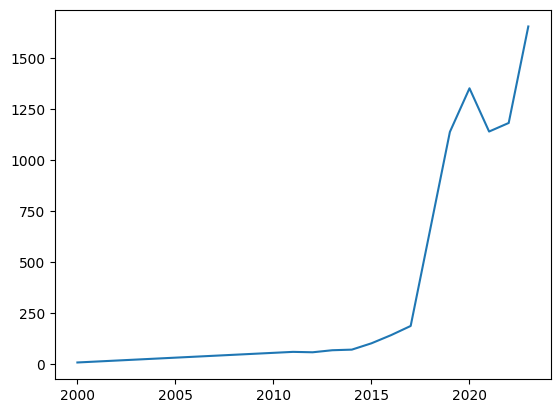

In [10]:
df = pd.DataFrame([(int(row['key'][1]), int(row['values'][0]))
                   for row in scb_fetch],
                  columns=['year', 'population'])
plt.plot(df['year'], df['population']);

# Hierarhiskā navigācija

LVStat ļaui pārvietoties pa stat.gov.lv direktoriju.

In [27]:
lvstat = LVStat('lv')
lvstat.info()

[{'id': 'POP', 'type': 'l', 'text': 'Iedzīvotāji'},
 {'id': 'EMP', 'type': 'l', 'text': 'Darbs'},
 {'id': 'VES', 'type': 'l', 'text': 'Sociālā aizsardzība un veselība'},
 {'id': 'IZG', 'type': 'l', 'text': 'Izglītība, kultūra un zinātne'},
 {'id': 'VEK', 'type': 'l', 'text': 'Valsts un ekonomika'},
 {'id': 'TIR', 'type': 'l', 'text': 'Tirdzniecība un pakalpojumi'},
 {'id': 'ENT', 'type': 'l', 'text': 'Uzņēmējdarbība'},
 {'id': 'IKT', 'type': 'l', 'text': 'Informācijas tehnoloģijas'},
 {'id': 'NOZ', 'type': 'l', 'text': 'Nozares'},
 {'id': 'ENV', 'type': 'l', 'text': 'Vide'},
 {'id': 'FIN', 'type': 'l', 'text': 'Labklājības un vienlīdzības rādītāji'}]

In [28]:
lvstat.go_down('POP')
lvstat.info()

[{'id': 'IR',
  'type': 'l',
  'text': 'Iedzīvotāju skaits un raksturojošie rādītāji'},
 {'id': 'ID', 'type': 'l', 'text': 'Dzimstība'},
 {'id': 'IM', 'type': 'l', 'text': 'Mirstība'},
 {'id': 'NC', 'type': 'l', 'text': 'Nāves cēloņi'},
 {'id': 'IL', 'type': 'l', 'text': 'Laulības'},
 {'id': 'IB', 'type': 'l', 'text': 'Migrācija'},
 {'id': 'PM', 'type': 'l', 'text': 'Patvēruma meklētāji un bēgļi'},
 {'id': 'MV', 'type': 'l', 'text': 'Privāto mājsaimniecību un ģimeņu skaits'},
 {'id': 'MI', 'type': 'l', 'text': 'Mājsaimniecību ienākumi'},
 {'id': 'MB', 'type': 'l', 'text': 'Mājsaimniecību izdevumi un patēriņš'},
 {'id': 'NN',
  'type': 'l',
  'text': 'Monetārā nabadzība, nevienlīdzība un sociālā atstumtība'},
 {'id': 'MA', 'type': 'l', 'text': 'Mājokļi'},
 {'id': 'NO', 'type': 'l', 'text': 'Noziegumi, apsūdzētie un cietušie'},
 {'id': 'TS', 'type': 'l', 'text': 'Tiesu sistēma un ieslodzījuma vietas'},
 {'id': 'UG', 'type': 'l', 'text': 'Ugunsgrēki un glābšanas darbi'}]

In [29]:
lvstat.go_down('MA')
lvstat.info()

[{'id': 'MAS', 'type': 'l', 'text': 'Mājokļu skaits un veids'},
 {'id': 'MAA', 'type': 'l', 'text': 'Mājokļa apstākļi (EU-SILC)'},
 {'id': 'MAI', 'type': 'l', 'text': 'Izdevumi mājokļa uzturēšanai (EU-SILC)'}]

In [30]:
lvstat.go_down('MAA')
lvstat.info()

[{'id': 'MAA041',
  'type': 't',
  'text': 'Mājokļu labiekārtotība (procentos) 2008 - 2020',
  'updated': '2024-03-01T13:05:00'},
 {'id': 'MAA011',
  'type': 't',
  'text': 'Mājsaimniecību īpatsvars, kas norādījušas atsevišķas problēmas saistībā ar sava mājokļa vidi (procentos) 2005 - 2020',
  'updated': '2024-03-01T13:04:00'},
 {'id': 'MAA010',
  'type': 't',
  'text': 'Mājsaimniecību īpatsvars, kas norādījušas atsevišķas problēmas saistībā ar sava mājokļa vidi (procentos) 2005 - 2023',
  'updated': '2024-03-01T13:03:00'},
 {'id': 'MAA020',
  'type': 't',
  'text': 'Mājokļu vispārējais raksturojums 2005 - 2023',
  'updated': '2024-03-01T13:00:00'},
 {'id': 'MAA030',
  'type': 't',
  'text': 'Mājokļa veids (procentos) 2005 - 2023',
  'updated': '2024-03-01T13:00:00'},
 {'id': 'MAA040',
  'type': 't',
  'text': 'Mājokļu labiekārtotība (procentos) 2008 - 2023',
  'updated': '2024-03-01T13:00:00'}]

In [31]:
lvstat.go_down('MAA020')
lvstat.info()

{'title': 'Mājokļu vispārējais raksturojums – Rādītāji, Mājokļa raksturojums un Laika periods',
 'variables': [{'code': 'INDICATOR',
   'text': 'Rādītāji',
   'values': ['ALL',
    'A1_CH',
    'A1_16_64',
    'A1_GE65',
    'A2_NCH',
    'A2_1CH',
    'A2_2CH',
    'A2_GE3CH',
    'LV',
    'LV00A',
    'LV006',
    'LV007',
    'LV00C',
    'LV008',
    'LV00B',
    'LV003',
    'LV009',
    'LV005',
    'RURAL',
    'URBAN'],
   'valueTexts': ['Pavisam',
    'Viens pieaugušais ar bērniem',
    'Viena persona (16-64 gadi)',
    'Viena persona (65 gadi un vairāk)',
    'Pāris bez bērniem',
    'Pāris ar vienu bērnu',
    'Pāris ar diviem bērniem',
    'Pāris ar trīs vai vairāk bērniem',
    'Latvija',
    'Rīgas statistiskais reģions (no 01.01.2024.)',
    'Rīgas statistiskais reģions (Rīga) (līdz 01.01.2024.)',
    'Pierīgas statistiskais reģions (līdz 01.01.2024.)',
    'Vidzemes statistiskais reģions (no 01.01.2024.)',
    'Vidzemes statistiskais reģions (līdz 01.01.2024.)',
    'K

In [32]:
lvstat.get_variables()

{'Rādītāji': ['Pavisam',
  'Viens pieaugušais ar bērniem',
  'Viena persona (16-64 gadi)',
  'Viena persona (65 gadi un vairāk)',
  'Pāris bez bērniem',
  'Pāris ar vienu bērnu',
  'Pāris ar diviem bērniem',
  'Pāris ar trīs vai vairāk bērniem',
  'Latvija',
  'Rīgas statistiskais reģions (no 01.01.2024.)',
  'Rīgas statistiskais reģions (Rīga) (līdz 01.01.2024.)',
  'Pierīgas statistiskais reģions (līdz 01.01.2024.)',
  'Vidzemes statistiskais reģions (no 01.01.2024.)',
  'Vidzemes statistiskais reģions (līdz 01.01.2024.)',
  'Kurzemes statistiskais reģions (no 01.01.2024.)',
  'Kurzemes statistiskais reģions (līdz 01.01.2024.)',
  'Zemgales statistiskais reģions',
  'Latgales statistiskais reģions',
  'Lauku teritorijas',
  'Pilsētas'],
 'Mājokļa raksturojums': ['Vidējais istabu skaits mājsaimniecību lietošanā',
  'Istabu skaits uz vienu mājsaimniecības locekli',
  'Mājokļa vidējā platība, m2'],
 'Laika periods': ['2005',
  '2006',
  '2007',
  '2008',
  '2009',
  '2010',
  '2011',
  